In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import *


In [ ]:
# for i in range(0, 20):
#     os.mkdir('dataset\\'+str(i))

In [ ]:
# def Remove(duplicate):
#     final_list = []
#     for num in duplicate:
#         if num not in final_list:
#             final_list.append(num)
#     return final_list

In [ ]:
# from bs4 import BeautifulSoup
# import shutil

# labels = ['person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 'aeroplane', 'bicycle', 'boat', 'bus',
#           'car', 'motorbike', 'train', 'bottle', 'chair', 'diningtable', 'pottedplant', 'sofa', 'tvmonitor']

# directory = 'Annotations'

# i=0
# cnt = np.zeros(20)
# for filename in os.listdir('Annotations'):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         with open(f, 'r') as file:
#             data = file.read()
#         Bs_data = BeautifulSoup(data, "xml")
#         b_name = Bs_data.find('name')
#         try:
#             label = labels.index(b_name.string)
#             cnt[label] += 1
#             shutil.copy('JPEGImages\\'+f[12:23]+'.jpg', 'dataset\\'+str(label))
#             if i % 1000 ==0:
#                 print(i)
#             # labelList=[]
#             # for element in b_name:
#             #     print(b_name)
#             #     labelList.append(labels.index(element.string))
#             # labelList = Remove(labelList)
#             # for label in labelList:
#             #     shutil.copy('JPEGImages\\'+f[12:23]+'.jpg', 'dataset\\'+str(label))
#         except:
#             print(f[12:23], b_name.string, i)
#     i+=1

In [ ]:
# cnt = np.array([6890.,  767., 1047.,  326., 1204.,  465.,  344.,  683.,  449.,
#         462.,  405.,  785.,  431.,  533.,  391.,  547.,  287.,  278.,
#         392.,  439.])
# np.save('count', cnt)

In [2]:
train = keras.utils.image_dataset_from_directory(
    directory = './dataset',
    validation_split=0.1,
    subset='training',
    seed=123,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (128, 128),
)

Found 17125 files belonging to 20 classes.
Using 15413 files for training.


In [3]:
val = keras.utils.image_dataset_from_directory(
    directory = './dataset',
    validation_split=0.2,
    subset='validation',
    seed=123,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (128, 128),
)

Found 17125 files belonging to 20 classes.
Using 3425 files for validation.


In [4]:
model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    
    Conv2D(64, kernel_size=(5,5), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),

    Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    
    Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(20, activation='sigmoid')
])

In [ ]:
model.summary()

In [14]:
model.load_weights(path)

In [5]:
class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') > 0.85):
			print(logs)
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.99*100))
			self.model.stop_training = True

callback = myCallback()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, epochs=50, validation_data=val, callbacks=[callback])

Epoch 1/50
482/482 [==============================] - 22s 39ms/step - loss: 2.5239 - accuracy: 0.3962 - val_loss: 2.1990 - val_accuracy: 0.4158
Epoch 2/50
482/482 [==============================] - 19s 39ms/step - loss: 2.2029 - accuracy: 0.4079 - val_loss: 2.0710 - val_accuracy: 0.4231
Epoch 3/50
482/482 [==============================] - 19s 40ms/step - loss: 2.1007 - accuracy: 0.4163 - val_loss: 2.0193 - val_accuracy: 0.4447
Epoch 4/50
482/482 [==============================] - 20s 40ms/step - loss: 2.0210 - accuracy: 0.4303 - val_loss: 1.9656 - val_accuracy: 0.4540
Epoch 5/50
482/482 [==============================] - 20s 40ms/step - loss: 1.9262 - accuracy: 0.4461 - val_loss: 1.8553 - val_accuracy: 0.4785
Epoch 6/50
482/482 [==============================] - 20s 41ms/step - loss: 1.8226 - accuracy: 0.4643 - val_loss: 1.8898 - val_accuracy: 0.4695
Epoch 7/50
482/482 [==============================] - 20s 41ms/step - loss: 1.6966 - accuracy: 0.4872 - val_loss: 1.7228 - val_accuracy:

In [13]:
path='model_checkpoints/31_12_2022(1)/model.pkl'
 
# save
model.save_weights(path)

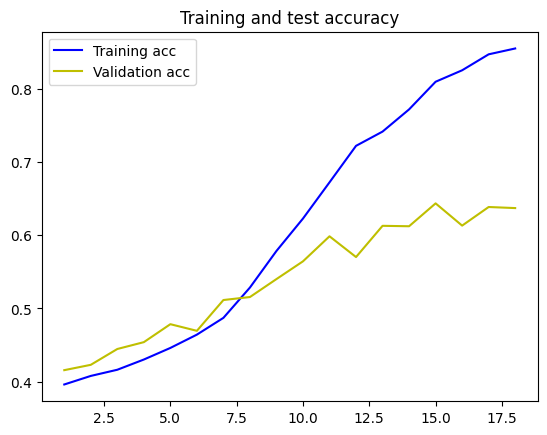

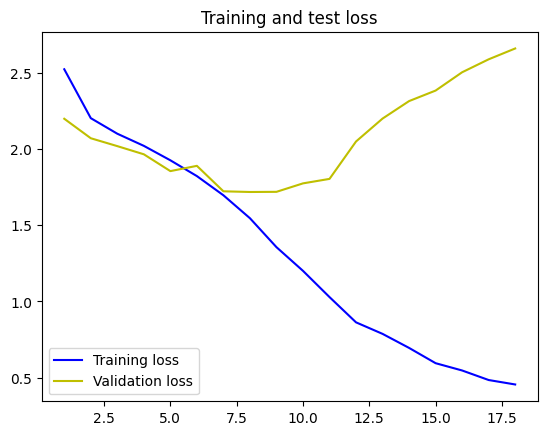

In [6]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'y', label='Validation acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

In [12]:
temp = np.array([history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss']])
np.save('model_checkpoints\\31_12_2022(1)\\metrics.npy', temp)